In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
# !pip install tensorflow
# import pickle
# import tensorflow as tf
#  UpSampling2D, BatchNormalization
sys.path.insert(0,'../../..')
from gp2 import Runner

In [3]:

R = Runner(verbose=True)

*** GP2 UNet ***
Working directory: /tmp/tmp9y888a3bGP2
Verbose mode active!
Using default discriminator (CNN)


In [6]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/Lung_Opacity/Lung_images_final.npy')
masks = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/Lung_Opacity/Lung_masks_final.npy')

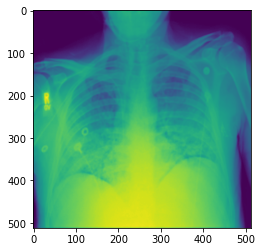

In [7]:
plt.imshow(images[500])

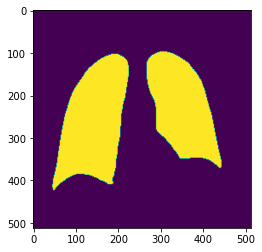

In [8]:
plt.imshow(masks[500])

In [9]:
len(images)

6012

In [10]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [11]:
#
#
R.setup_data(images, masks, dataset_size=6012, weights=weights)

Weights OK!


In [12]:
RUNS = 5

In [13]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R.run_classifier()
    R.run_discriminator()
    R.find_machine_labels()
    R.relabel()
    print('TOOK', time.time()-t0, 'seconds')
    

***
RUN: 0


2023-04-12 20:26:13.738047: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-12 20:26:13.741051: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:b7:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-04-12 20:26:13.746402: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible gpu devices: 0
2023-04-12 20:26:13.746809: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-04-12 20:26:14.727509: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1258] Device interconnect StreamExecuto

Epoch 1/100


2023-04-12 20:26:22.614343: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-04-12 20:26:23.489354: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-04-12 20:26:24.569456: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2023-04-12 20:26:24.569479: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2023-04-12 20:26:24.569871: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-04-12 20:26:24.676468: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-04-12 20:26:25.748372: I tensorflow/stream_exec

5/5 [==============================] - 31s 4s/step - loss: 1.6155 - dice_coeff: 0.3852 - val_loss: 1.3917 - val_dice_coeff: 0.3058


2023-04-12 20:26:52.704535: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


Epoch 2/100
5/5 [==============================] - 7s 2s/step - loss: 1.2047 - dice_coeff: 0.4533 - val_loss: 1.3859 - val_dice_coeff: 0.3058
Epoch 3/100
5/5 [==============================] - 7s 1s/step - loss: 1.0131 - dice_coeff: 0.5053 - val_loss: 1.3838 - val_dice_coeff: 0.3059
Epoch 4/100
5/5 [==============================] - 7s 1s/step - loss: 0.9206 - dice_coeff: 0.5397 - val_loss: 1.3828 - val_dice_coeff: 0.3056
Epoch 5/100
5/5 [==============================] - 7s 1s/step - loss: 0.8610 - dice_coeff: 0.5577 - val_loss: 1.3819 - val_dice_coeff: 0.3054
Epoch 6/100
5/5 [==============================] - 7s 2s/step - loss: 0.8169 - dice_coeff: 0.5721 - val_loss: 1.3807 - val_dice_coeff: 0.3050
Epoch 7/100
5/5 [==============================] - 7s 2s/step - loss: 0.7493 - dice_coeff: 0.6018 - val_loss: 1.3787 - val_dice_coeff: 0.3047
Epoch 8/100
5/5 [==============================] - 7s 2s/step - loss: 0.7331 - dice_coeff: 0.6082 - val_loss: 1.3763 - val_dice_coeff: 0.3044
Epoch 

2023-04-12 20:36:24.022155: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


Model saved to /tmp/tmp1vyl1unjGP2/cnnd_0.model
History saved to /tmp/tmp1vyl1unjGP2/cnnd_history_0.pickle
Testing the discriminator...
12/12 [==============================] - 1s 38ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Found 167 machine labels.
Machine labels [  8   9  15  16  19  21  22  23  28  30  31  32  34  36  38  40  44  49
  52  54  56  57  59  62  64  66  67  68  71  74  75  76  77  78  80  81
  82  87  89  91  94  95  96  97  98  99 100 101 102 103 104 111 112 113
 114 116 119 121 122 123 124 130 132 133 138 140 145 149 150 152 153 154
 156 157 158 160 163 165 166 168 173 175 176 182 183 184 187 189 191 192
 193 196 197 200 201 202 204 205 207 210 211 212 215 217 218 222 226 231
 234 235 236 237 239 240 242 243 245 247 249 251 252 255 257 258 259 260
 262 267 269 270 273 275 276 277 278 280 281 282 283 285 290 292 295 297
 300 301 302 303 304 309 311 321 324 327 332 335 338 339 341 349 351 353
 354 355 356 357 358]
D_ids ['602c57a1-9d1f-417c-9253-58de6b4429d5', 'fe91

In [14]:
R.classifier_scores

[[1.2830660343170166, 0.2845652103424072],
 [0.9472792744636536, 0.49221545457839966],
 [0.9052565097808838, 0.49347877502441406],
 [0.809575080871582, 0.5901122689247131],
 [0.829034149646759, 0.6573423147201538]]

In [15]:
R.discriminator_scores

[[0.0, 1.0],
 [40.95536804199219, 0.5472221970558167],
 [41.15135192871094, 0.5333333611488342],
 [53.10768127441406, 0.5166666507720947],
 [73.3858642578125, 0.5111111402511597]]

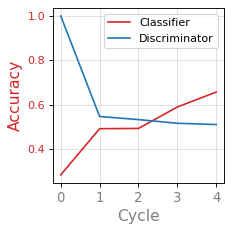

In [16]:
R.plot()